<a href="https://colab.research.google.com/github/himanshu91b/Google_Colab_ML_Models/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

try:
  # Use the %tensorflow_version magic if in colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

import time
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

import tensorflow_hub as hub


In [ ]:
base_dir = '/content/drive/My Drive/thesis/dataset'

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
batch_size = 40
IMG_SHAPE = 150 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

Found 627 images belonging to 3 classes.


In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')

Found 180 images belonging to 3 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Confusion Matrix and Classification Report
 from sklearn.metrics import classification_report
 from sklearn import svm, metrics, datasets

print(__doc__)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
 Y_pred = model.predict_generator(val_data_gen, 180 // 
 batch_size+1)
 y_pred = np.argmax(Y_pred, axis=1)
 print('Confusion Matrix')
 print(confusion_matrix(val_data_gen.classes, y_pred))
 print('Classification Report')
 target_names = ['Cats', 'Dogs','dfsads']
 print(classification_report(val_data_gen.classes, y_pred, 
 target_names=target_names))

Automatically created module for IPython interactive environment
Confusion Matrix
[[41 13  6]
 [42 11  7]
 [39  9 12]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.34      0.68      0.45        60
        Dogs       0.33      0.18      0.24        60
      dfsads       0.48      0.20      0.28        60

    accuracy                           0.36       180
   macro avg       0.38      0.36      0.32       180
weighted avg       0.38      0.36      0.32       180



In [ ]:
epochs = 5

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
16/16 [==============================] - 437s 27s/step - loss: 1.4124 - accuracy: 0.3461 - val_loss: 1.0915 - val_accuracy: 0.3333
Epoch 2/5
16/16 [==============================] - 22s 1s/step - loss: 1.0615 - accuracy: 0.4035 - val_loss: 1.0346 - val_accuracy: 0.3778
Epoch 3/5
16/16 [==============================] - 22s 1s/step - loss: 1.0278 - accuracy: 0.4322 - val_loss: 1.0467 - val_accuracy: 0.4833
Epoch 4/5
16/16 [==============================] - 22s 1s/step - loss: 1.0045 - accuracy: 0.5040 - val_loss: 0.9752 - val_accuracy: 0.5111
Epoch 5/5
16/16 [==============================] - 21s 1s/step - loss: 0.9013 - accuracy: 0.6093 - val_loss: 0.9381 - val_accuracy: 0.5222


In [ ]:
t = time.time()

export_path_keras = "./{}.h5".format(int(t))
print(export_path_keras)

model.save(export_path_keras)

./1584317473.h5


In [ ]:
!ls

1584317473.h5  drive  sample_data


In [ ]:
from PIL import Image
import numpy as np
from skimage import transform
def load(filename):
   np_image = Image.open(filename)
   np_image = np.array(np_image).astype('float32')/255
   np_image = transform.resize(np_image, (150, 150, 3))
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

image = load('/content/contrast_0.8_rotated_60_DSC_0336.jpg')
model.predict(image)

FileNotFoundError: ignored

In [ ]:
model = export_path_keras

In [ ]:
reloaded = tf.keras.models.load_model(
  model, 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

reloaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 20736)            

In [ ]:

reloaded.predict_classes(image)


array([1])

In [ ]:
image_batch, label_batch = next(iter(train_dir.take(1)))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()

predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
predicted_class_names

AttributeError: ignored

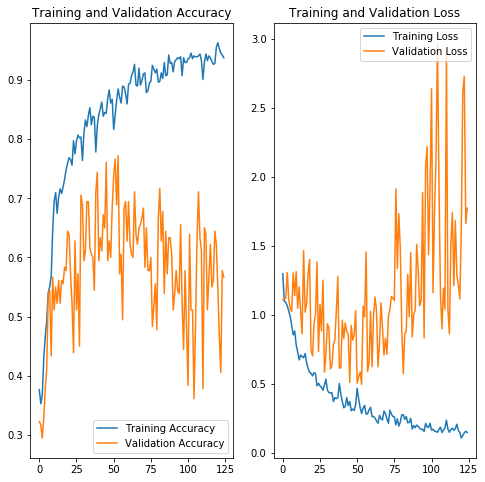

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn import svm, metrics, datasets

print(__doc__)

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

Automatically created module for IPython interactive environment


In [ ]:
Y_pred = model.predict_generator(val_data_gen, 180 // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('Classification Report')
target_names = ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))

Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[ 8 46  6]
 [10 45  5]
 [ 9 38 13]]
Classification Report
                       precision    recall  f1-score   support

Bacterial leaf blight       0.30      0.13      0.18        60
           Brown spot       0.35      0.75      0.48        60
            Leaf smut       0.54      0.22      0.31        60

             accuracy                           0.37       180
            macro avg       0.40      0.37      0.32       180
         weighted avg       0.40      0.37      0.32       180

